In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BNB-USD.csv to BNB-USD.csv
User uploaded file "BNB-USD.csv" with length 219247 bytes


In [ ]:
import io
df = pd.read_csv(io.StringIO(uploaded['BNB-USD.csv'].decode('utf-8')))
df.head()

,timestamp,adjclose,open,low,high,volume,close
0,2017-11-09 00:00:00,1.99077,2.05314,1.89394,2.17423,19192200,1.99077
1,2017-11-10 00:00:00,1.79684,2.00773,1.64478,2.06947,11155000,1.79684
2,2017-11-11 00:00:00,1.67047,1.78628,1.61429,1.91775,8178150,1.67047
3,2017-11-12 00:00:00,1.51969,1.66889,1.46256,1.67280,15298700,1.51969
4,2017-11-13 00:00:00,1.68662,1.52601,1.51760,1.73502,12238800,1.68662


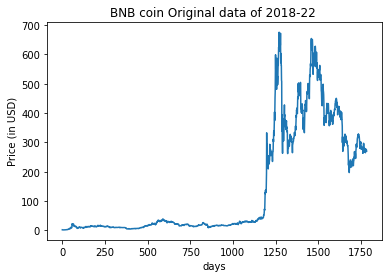

In [ ]:

plt.plot(df.index, df['adjclose'])
plt.title('BNB coin Original data of 2018-22 ')
plt.xlabel('days')
plt.ylabel('Price (in USD)')
plt.show()

In [ ]:
# Converting the'x'variable i.e. the Days column in to date-time format, to be treated as the index of Y here.
df['timestamp'] = pd.to_datetime(df["timestamp"])
df.set_index('timestamp', inplace = True)

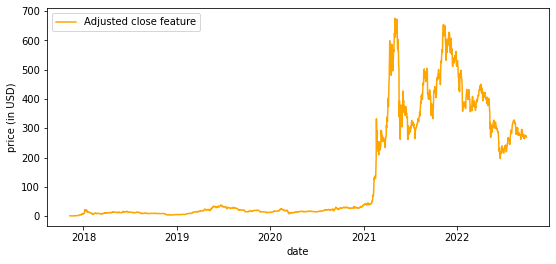

In [ ]:
plt.figure(figsize=(9,4))
plt.plot(df['adjclose'],color='orange', label= 'Adjusted close feature')
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

Text(0, 0.5, 'price (in USD)')

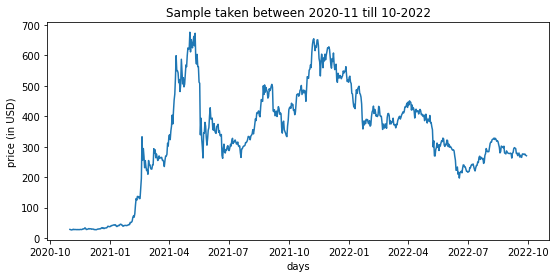

In [ ]:
plt.figure(figsize=(9,4))
df = df.loc['2020-11' : '2022']
plt.plot(df['adjclose'])
plt.title("Sample taken between 2020-11 till 10-2022" )
plt.xlabel("days")
plt.ylabel("price (in USD)")

In [ ]:
# Dataset with date index (X - independent variable)
df['adjclose']= np.round(df['adjclose'][:],1)
df['adjclose']

timestamp
2020-11-01 00:00:00     28.5
2020-11-02 00:00:00     27.9
2020-11-03 00:00:00     26.9
2020-11-04 00:00:00     26.9
2020-11-05 00:00:00     27.7
                       ...  
2022-09-24 00:00:00    275.1
2022-09-25 00:00:00    274.1
2022-09-26 00:00:00    275.9
2022-09-27 00:00:00    272.4
2022-09-28 08:54:00    270.3
Name: adjclose, Length: 697, dtype: float64

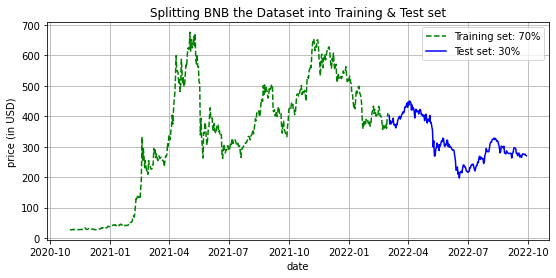

In [ ]:
plt.figure(figsize=(9,4))
plt.grid(True)
to_row = int(len(df)*0.70)
training_data = list(df[0:to_row]['adjclose'])
testing_data = list(df[to_row:]['adjclose'])
plt.plot(df[0:to_row]['adjclose'],color='green', label= 'Training set: 70%',linestyle ='dashed')
plt.plot(df[to_row:]['adjclose'],color='blue', label= 'Test set: 30%')
plt.title("Splitting BNB the Dataset into Training & Test set")
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

In [ ]:
# define input sequence
timeseries_data = list(df[0:to_row]['adjclose'])

In [ ]:
# Working on Univariate data
# preparing independent and dependent features
def prepare_data(timeseries_data, n_steps):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# choosing a number of time steps
n_steps = 3
# splitting into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
#for i in range(len(X)):
 # print(X[i],y[i])

In [ ]:
print(df[0:to_row]['adjclose'])

timestamp
2020-11-01     28.5
2020-11-02     27.9
2020-11-03     26.9
2020-11-04     26.9
2020-11-05     27.7
              ...  
2022-02-26    373.6
2022-02-27    360.5
2022-02-28    395.6
2022-03-01    408.5
2022-03-02    409.0
Name: adjclose, Length: 487, dtype: float64


In [ ]:
 n_features = 1
# #X = X.reshape((X.shape[0], X.shape[1], n_features))



Applying Bidirectional LSTM Algorithm:
 allow the LSTM model to learn the input sequence both forward and backwards and concatenate both interpretations.
 We can implement a Bidirectional LSTM for univariate time series forecasting by wrapping the first hidden layer in a wrapper layer called Bidirectional.

In [ ]:
# define model
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]

X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:

...
# fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
16/16 [==============================] - 4s 22ms/step - loss: 111723.7812
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 47746.0078
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 1990.3018
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 716.5844
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 618.5046
Epoch 6/200
16/16 [==============================] - 0s 7ms/step - loss: 578.6526
Epoch 7/200
16/16 [==============================] - 0s 7ms/step - loss: 551.1072
Epoch 8/200
16/16 [==============================] - 0s 6ms/step - loss: 534.0161
Epoch 9/200
16/16 [==============================] - 0s 6ms/step - loss: 530.4714
Epoch 10/200
16/16 [==============================] - 0s 7ms/step - loss: 533.8360
Epoch 11/200
16/16 [==============================] - 0s 7ms/step - loss: 547.5040
Epoch 12/200
16/16 [==============================] - 0s 6ms/step - loss: 546.4706
Epoch 

In [ ]:
x_input = np.array([395.6, 408.5, 409.0])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


[404.1205]
1 day input [408.5        409.         404.12051392]
1 day output [[402.50293]]
2 day input [409.         404.12051392 402.50292969]
2 day output [[400.80008]]
3 day input [404.1205  402.50293 400.80008]
3 day output [[398.67847]]
4 day input [402.50293 400.80008 398.67847]
4 day output [[396.7395]]
5 day input [400.80008 398.67847 396.7395 ]
5 day output [[394.8651]]
6 day input [398.67847 396.7395  394.8651 ]
6 day output [[392.99704]]
7 day input [396.7395  394.8651  392.99704]
7 day output [[391.1685]]
8 day input [394.8651  392.99704 391.1685 ]
8 day output [[389.37833]]
9 day input [392.99704 391.1685  389.37833]
9 day output [[387.62128]]


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100)              20800     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
df[0:to_row]['adjclose']

timestamp
2020-11-01     28.5
2020-11-02     27.9
2020-11-03     26.9
2020-11-04     26.9
2020-11-05     27.7
              ...  
2022-02-26    373.6
2022-02-27    360.5
2022-02-28    395.6
2022-03-01    408.5
2022-03-02    409.0
Name: adjclose, Length: 487, dtype: float64

In [ ]:
#test_set = df[to_row::10]['adjclose']
test_set = df[to_row:][0:10]['adjclose']

test_set


timestamp
2022-03-03    402.6
2022-03-04    374.3
2022-03-05    384.9
2022-03-06    375.0
2022-03-07    381.3
2022-03-08    382.0
2022-03-09    393.6
2022-03-10    372.2
2022-03-11    372.2
2022-03-12    372.7
Name: adjclose, dtype: float64

In [ ]:
date = df[to_row:][0:10]['adjclose'].index

In [ ]:
lst_output

[404.1205,
 402.50293,
 400.80008,
 398.67847,
 396.7395,
 394.8651,
 392.99704,
 391.1685,
 389.37833,
 387.62128]

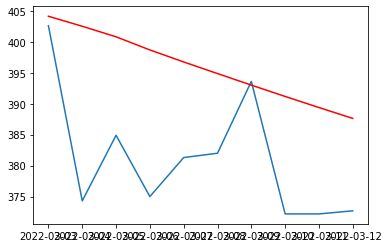

In [ ]:
plt.plot(date,test_set)
plt.plot(date,lst_output, color = 'r')

In [ ]:
# performance Evaluation of 10 days Predictions

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("Computing the R-squared value:")
r2_score = r2_score(test_set,lst_output)
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:-2.0574365008641617


In [ ]:
# CALCULATING MEAN ABSOLUTE PERCENTAGE ERROR
MAPE = np.mean(np.abs(np.array(lst_output) - np.array(test_set)) / np.abs(test_set))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.03964316386602551


In [ ]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(test_set, lst_output)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

17.008807530516915


In [ ]:
# CALCULATING MEAN ABSOLUTE ERROR
MAE = mean_absolute_error(test_set,lst_output)
print(f'Mean_Absolute_Error:{MAE}')

Mean_Absolute_Error:14.927765502929692
